In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
df = pd.read_csv(r"C:\Users\Shreya Marathe\Desktop\Project\Customer_Behaviour_Analysis\Data\cleaned_customer_data.csv")
df.head()


,customer_id,age,gender,item_purchased,category,purchase_amount,location,color,season,review_rating,...,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_cycle_days,loyalty_score,payment_category,is_digital_payment
0,1,55,Male,Top,Clothing,53,Kentucky,Gray,Winter,3.1,...,Express,Yes,14,Venmo,Fortnightly,Adult,14,13.0,Digital Wallet,True
1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,...,Express,Yes,2,Cash,Fortnightly,Adult,14,7.0,Cash,False
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,...,Free Shipping,Yes,23,Credit Card,Weekly,Adult,7,18.5,Card,True
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,...,Next Day Air,Yes,49,PayPal,Weekly,Adult,7,31.5,Digital Wallet,True
4,5,45,Male,Top,Clothing,49,Oregon,Turquoise,Spring,2.7,...,Free Shipping,Yes,31,PayPal,Annually,Adult,365,18.5,Digital Wallet,True


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3900 non-null   int64  
 1   age                     3900 non-null   int64  
 2   gender                  3900 non-null   object 
 3   item_purchased          3900 non-null   object 
 4   category                3900 non-null   object 
 5   purchase_amount         3900 non-null   int64  
 6   location                3900 non-null   object 
 7   color                   3900 non-null   object 
 8   season                  3900 non-null   object 
 9   review_rating           3900 non-null   float64
 10  subscription_status     3900 non-null   object 
 11  shipping_type           3900 non-null   object 
 12  discount_applied        3900 non-null   object 
 13  previous_purchases      3900 non-null   int64  
 14  payment_method          3900 non-null   

,customer_id,age,purchase_amount,review_rating,previous_purchases,purchase_cycle_days,loyalty_score
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538,89.133077,16.183974
std,1125.977353,15.207589,23.685392,0.716223,14.447125,119.037566,7.429885
min,1.000000,18.000000,20.000000,2.500000,1.000000,7.000000,1.500000
25%,975.750000,31.000000,39.000000,3.100000,13.000000,14.000000,10.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000,30.000000,16.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000,90.000000,22.500000
max,3900.000000,70.000000,100.000000,5.000000,50.000000,365.000000,32.000000


In [6]:
df.isnull().sum()


customer_id               0
age                       0
gender                    0
item_purchased            0
category                  0
purchase_amount           0
location                  0
color                     0
season                    0
review_rating             0
subscription_status       0
shipping_type             0
discount_applied          0
previous_purchases        0
payment_method            0
frequency_of_purchases    0
age_group                 0
purchase_cycle_days       0
loyalty_score             0
payment_category          0
is_digital_payment        0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

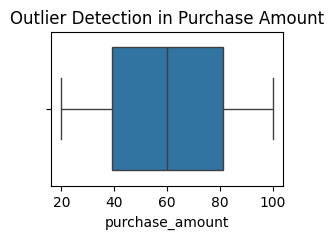

In [8]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df['purchase_amount'])
plt.title("Outlier Detection in Purchase Amount")
plt.show()


CUSTOMER BEHAVIOUR

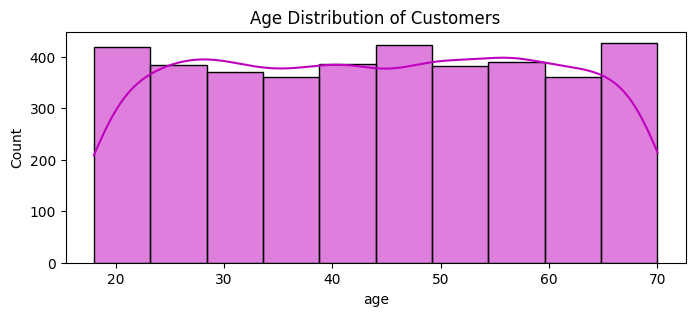

In [9]:
# Age Distribution
plt.figure(figsize=(8,3))
sns.histplot(df['age'], bins=10, kde=True, color='m')
plt.title("Age Distribution of Customers")
plt.show()


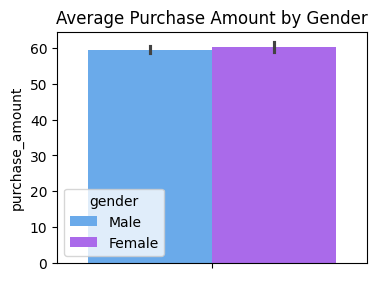

In [10]:
# Gender vs Purchase Amount
plt.figure(figsize=(4,3))
sns.barplot(hue='gender', y='purchase_amount', data=df, estimator='mean', palette='cool')
plt.title("Average Purchase Amount by Gender")
plt.show()


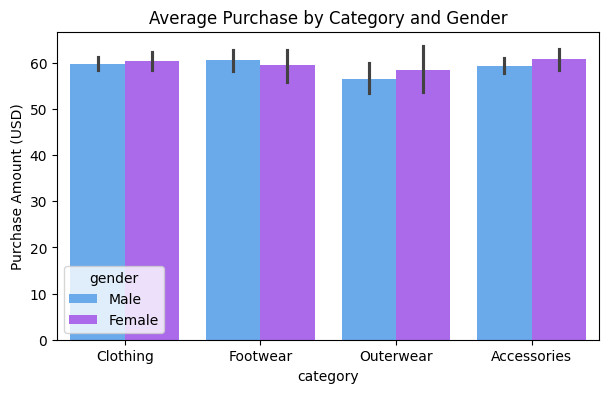

In [11]:
plt.figure(figsize=(7,4))
sns.barplot(x='category', y='purchase_amount', hue='gender', data=df, estimator='mean', palette='cool')
plt.title("Average Purchase by Category and Gender")
plt.ylabel("Purchase Amount (USD)")
plt.show()


C:\Users\Shreya Marathe\AppData\Local\Temp\ipykernel_15748\2909552087.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='loyalty_score', data=df, estimator='mean', ci=None, palette='mako')
C:\Users\Shreya Marathe\AppData\Local\Temp\ipykernel_15748\2909552087.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='loyalty_score', data=df, estimator='mean', ci=None, palette='mako')


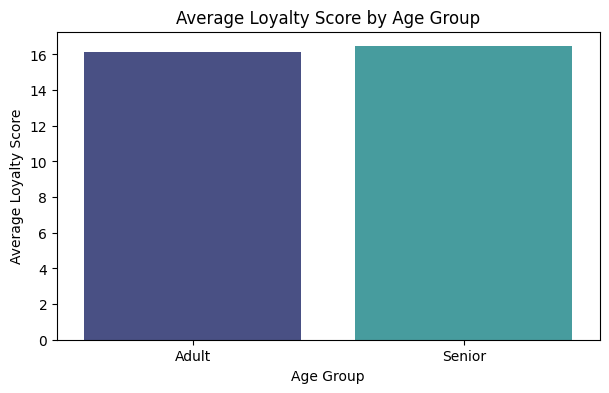

In [12]:
plt.figure(figsize=(7,4))
sns.barplot(x='age_group', y='loyalty_score', data=df, estimator='mean', ci=None, palette='mako')
plt.title('Average Loyalty Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Loyalty Score')
plt.show()


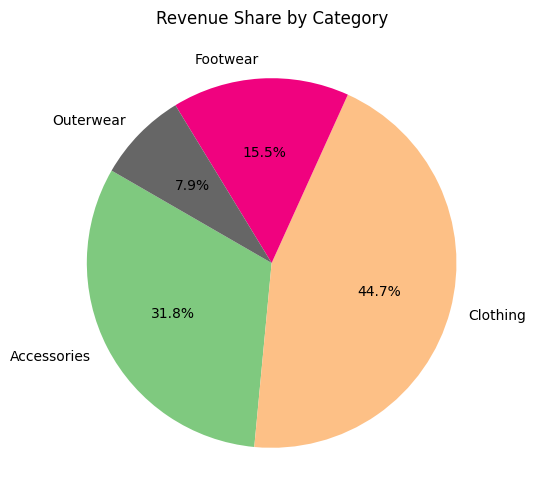

In [13]:
category_share = df.groupby('category')['purchase_amount'].sum()
plt.figure(figsize=(6,6))
category_share.plot.pie(autopct='%1.1f%%', startangle=150, cmap='Accent')
plt.title("Revenue Share by Category")
plt.ylabel("")
plt.show()


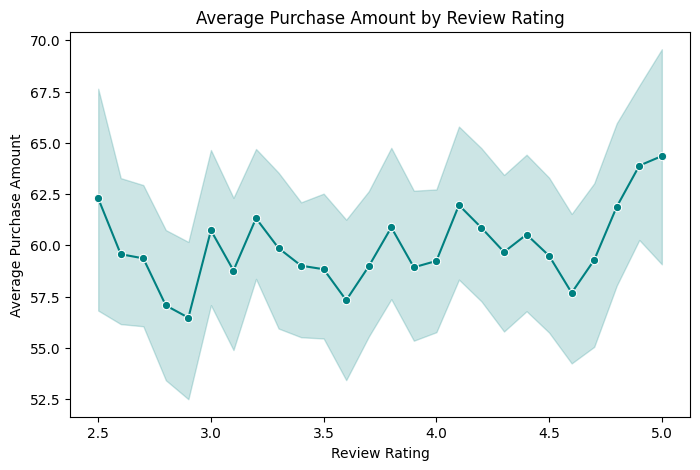

In [14]:
plt.figure(figsize=(8,5))
sns.lineplot(
    x='review_rating',
    y='purchase_amount',
    data=df,
    estimator='mean',
    marker='o',
    color='teal'
)
plt.title("Average Purchase Amount by Review Rating")
plt.xlabel("Review Rating")
plt.ylabel("Average Purchase Amount")
plt.show()


C:\Users\Shreya Marathe\AppData\Local\Temp\ipykernel_15748\849970136.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette='magma')


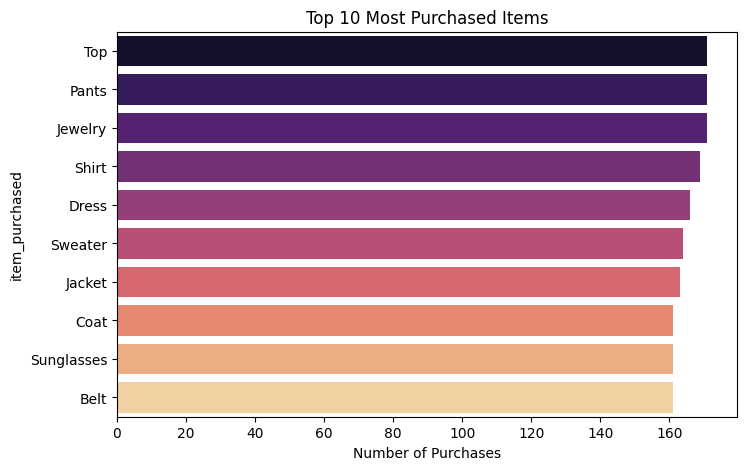

In [15]:
# Top 10 Items Purchased
top_items = df['item_purchased'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_items.values, y=top_items.index, palette='magma')
plt.title("Top 10 Most Purchased Items")
plt.xlabel("Number of Purchases")
plt.show()


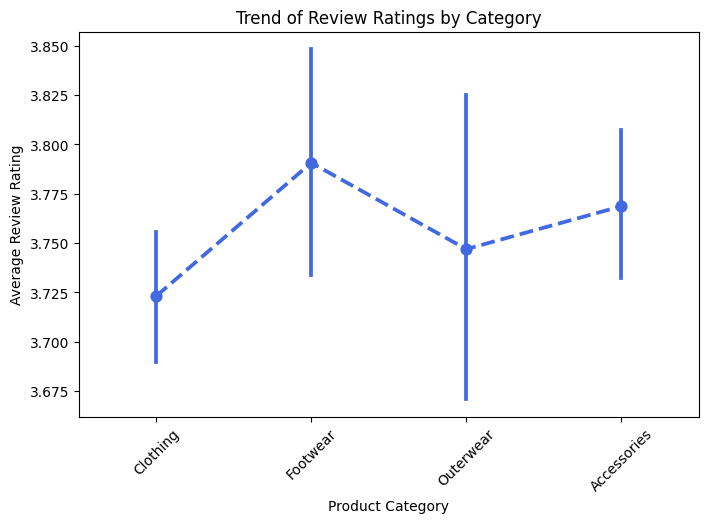

In [16]:
plt.figure(figsize=(8,5))
sns.pointplot(x='category', y='review_rating', data=df, color='royalblue', markers='o', linestyles='--')
plt.title('Trend of Review Ratings by Category')
plt.xlabel('Product Category')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=45)
plt.show()


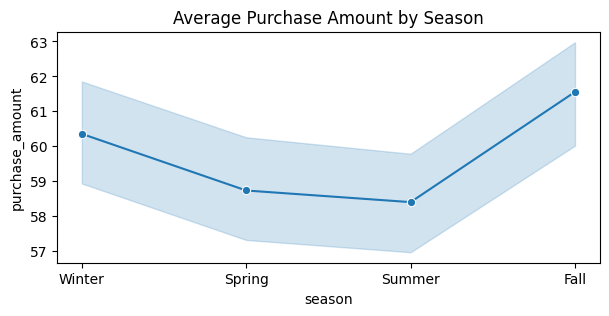

In [17]:
#Season vs Purchase Amount
plt.figure(figsize=(7,3))
sns.lineplot(x='season', y='purchase_amount', data=df, estimator='mean', marker='o')
plt.title("Average Purchase Amount by Season")
plt.show()


   season    color  purchase_count
0    Fall  Magenta              50
1  Spring    Olive              52
2  Summer   Silver              59
3  Winter    Green              50


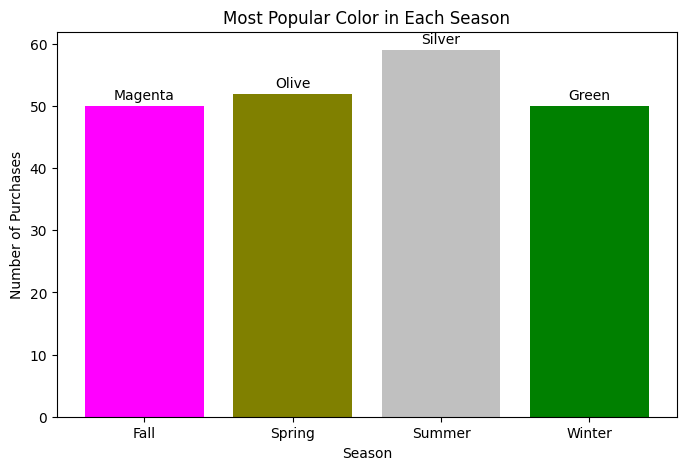

In [18]:
top_colors = (
    df.groupby(['season', 'color'])
    .size()
    .reset_index(name='purchase_count')
    .sort_values(['season', 'purchase_count'], ascending=[True, False])
    .drop_duplicates('season')
    .reset_index(drop=True)
)
print(top_colors)



# Create a color map (add more if your dataset has others)
color_map = {
    'Red': 'red',
    'Blue': 'blue',
    'Green': 'green',
    'Yellow': 'yellow',
    'Black': 'black',
    'White': 'white',
    'Pink': 'pink',
    'Purple': 'purple',
    'Olive': 'olive',
    'Silver': 'silver',
    'Magenta': 'magenta',
    'Orange': 'orange',
    'Gray': 'gray'
}

# Get actual colors for the bars
bar_colors = [color_map.get(c, 'gray') for c in top_colors['color']]

# Plot with actual color shades
plt.figure(figsize=(8,5))
plt.bar(top_colors['season'], top_colors['purchase_count'], color=bar_colors)
for i, val in enumerate(top_colors['purchase_count']):
    plt.text(i, val+1, top_colors['color'][i], ha='center', fontsize=10, color='black')
plt.title('Most Popular Color in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.show()


C:\Users\Shreya Marathe\AppData\Local\Temp\ipykernel_15748\2948123225.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='discount_applied', y='purchase_amount', data=df, palette='pastel')


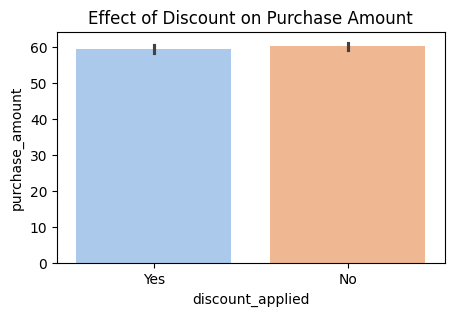

In [19]:
# Discount Impact on Purchase Amount
plt.figure(figsize=(5,3))
sns.barplot(x='discount_applied', y='purchase_amount', data=df, palette='pastel')
plt.title("Effect of Discount on Purchase Amount")
plt.show()


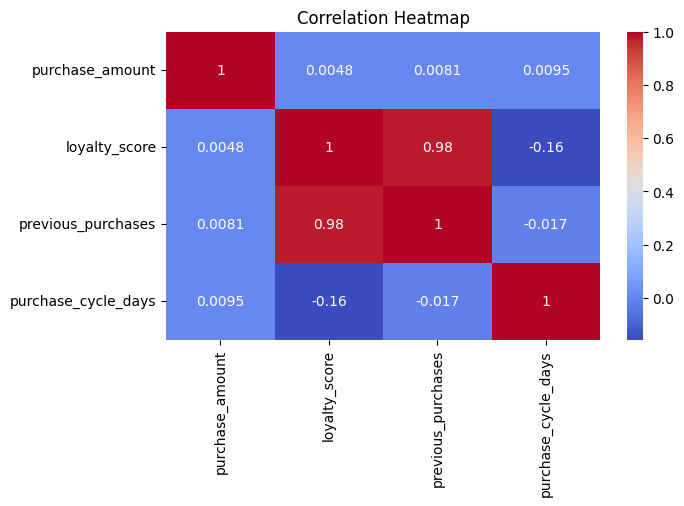

In [20]:
# Correlation Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(df[['purchase_amount','loyalty_score','previous_purchases','purchase_cycle_days']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


C:\Users\Shreya Marathe\AppData\Local\Temp\ipykernel_15748\2639683925.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


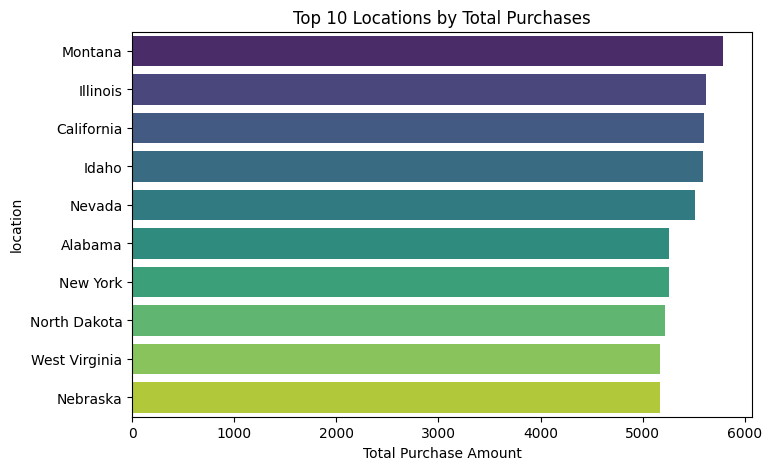

In [21]:
#Top 10 Locations by Total Purchases
top_locations = df.groupby('location')['purchase_amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title("Top 10 Locations by Total Purchases")
plt.xlabel("Total Purchase Amount")
plt.show()


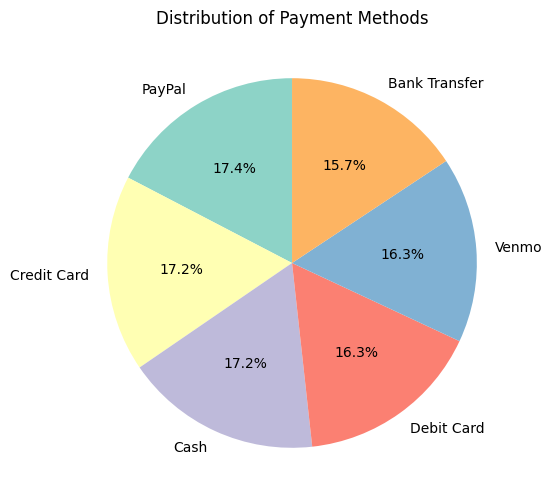

In [22]:
#Payment Method Usage
plt.figure(figsize=(6,6))
df['payment_method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title("Distribution of Payment Methods")
plt.ylabel("")
plt.show()


C:\Users\Shreya Marathe\AppData\Local\Temp\ipykernel_15748\656671940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_digital_payment', data=df, palette='Set1')


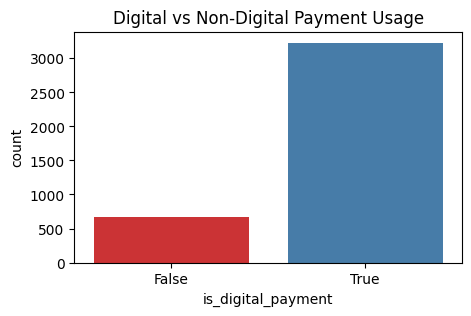

In [23]:
# Digital vs NonDigital
plt.figure(figsize=(5,3))
sns.countplot(x='is_digital_payment', data=df, palette='Set1')
plt.title("Digital vs Non-Digital Payment Usage")
plt.show()


C:\Users\Shreya Marathe\AppData\Local\Temp\ipykernel_15748\3921738054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_category', y = 'purchase_amount', data=df, estimator='sum', palette='plasma')


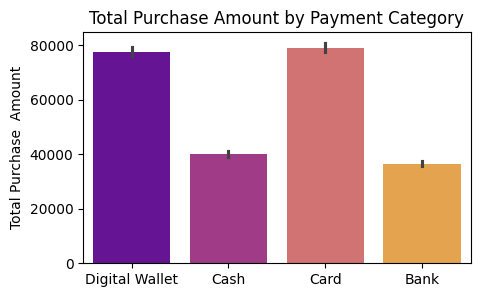

In [24]:
#payment category vs average purchase
plt.figure(figsize=(5,3))
sns.barplot(x='payment_category', y = 'purchase_amount', data=df, estimator='sum', palette='plasma')
plt.title("Total Purchase Amount by Payment Category")
plt.ylabel("Total Purchase  Amount")
plt.xlabel('')
plt.show()
